In [123]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib_inline

import re 


In [23]:
dfc = pd.read_csv('nike_data_2022_09.csv')

In [24]:
df = dfc.copy()

In [25]:
df = df.drop(columns=(['scraped_at','images','raw_description','description','url']))

In [26]:
uniq = [i for i in range(112)]

In [27]:
# replace unique id for the purpose of visuals and modeling
df.uniq_id = uniq


In [30]:
df.sub_title 

0                              Men's Long-Sleeve T-Shirt
1               Women's Nike Dri-FIT Soccer Jersey Dress
2                                         Men's Overalls
3      Big Kids' (Girls') Printed Tights (Extended Size)
4                                Big Kids' Soccer Jacket
                             ...                        
107                                     Basketball Shoes
108                                           Men's Polo
109                    Big Kids' (Boys') Full-Zip Jacket
110                        Men's Limited Football Jersey
111                              Women's Cropped T-Shirt
Name: sub_title, Length: 112, dtype: object

In [44]:
df.sub_title[0]



"Men's Long-Sleeve T-Shirt"

In [46]:
sex = df.sub_title[0].find("Men")
print(sex)

0


In [36]:
df['sex'] = 0

In [57]:
df.head(1)

,name,sub_title,brand,model,color,price,currency,availability,avg_rating,review_count,available_sizes,uniq_id,sex
0,Nike Dri-FIT Team (MLB Minnesota Twins),Men's Long-Sleeve T-Shirt,Nike,14226571,Navy,40.0,USD,InStock,NaN,NaN,S | M | L | XL | 2XL,0,m


In [79]:
# define a function to extract gender specificity labels
def get_gender_label(sub_title):
    if 'Men' in sub_title:
        return 'm'
    elif 'Women' in sub_title:
        return 'w'
    elif 'Boy' in sub_title:
        return 'b'
    elif 'Girl' in sub_title:
        return 'g'
    elif 'Kids' in sub_title:
        return 'k'
    elif 'Toddler' in sub_title:
        return 'k' 
    else:
        return 'u'  # if not matched, return 'u' for unknown



In [80]:

# create an empty list to store gender labels
gender_labels = []

# loop through the sub_titles column and apply the get_gender_label function to each element
for i in range(len(df['sub_title'])):
    gender_label = get_gender_label(df['sub_title'][i])
    gender_labels.append(gender_label)

# create a new column for gender labels
df['gender'] = gender_labels



In [81]:
# this lets me specify by sex
df.gender.value_counts()

m    49
w    20
k    18
u    18
b     5
g     2
Name: gender, dtype: int64

In [114]:
df = df.drop(columns= ['avg_rating','review_count'])

In [115]:
categorical = df.select_dtypes(include = object)

In [116]:
categorical.head(1)

,name,sub_title,brand,color,currency,availability,available_sizes,sex,gender
0,Nike Dri-FIT Team (MLB Minnesota Twins),Men's Long-Sleeve T-Shirt,Nike,Navy,USD,InStock,S | M | L | XL | 2XL,m,m


In [117]:
numerical = df.select_dtypes(exclude = object)

In [118]:
numerical = numerical.drop(columns = ['uniq_id','model'])

In [119]:
numerical

,price
0,40.00
1,90.00
2,140.00
3,22.97
4,70.00
...,...
107,165.00
108,50.00
109,75.00
110,160.00


In [130]:
sns.displot(data = numerical)

In [ ]:
# takeaways
* our highest price is around 175
* our lowest price is around 25
* our most sold item are around 50



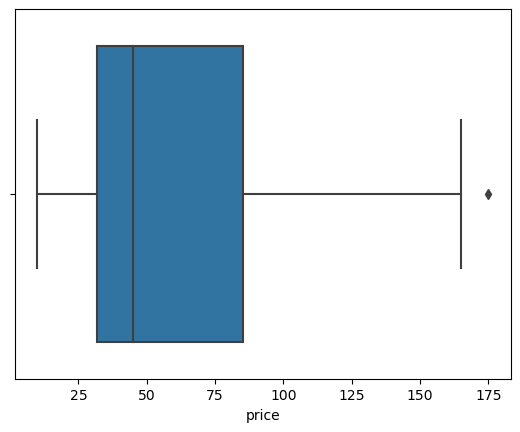

In [129]:
sns.boxplot(x=numerical.price)
plt.show()


# investigate outlier

In [131]:
df[df.price == 175] 

,name,sub_title,brand,model,color,price,currency,availability,available_sizes,uniq_id,sex,gender
68,Air Jordan XXXVI Low Luka PF,Men's Basketball Shoes,Nike,13828097,Laser Blue/Electro Purple/Pink Prime/Electric ...,175.0,USD,InStock,M 7 / W 8.5 | M 7.5 / W 9 | M 8 / W 9.5 | M 8....,68,0,m


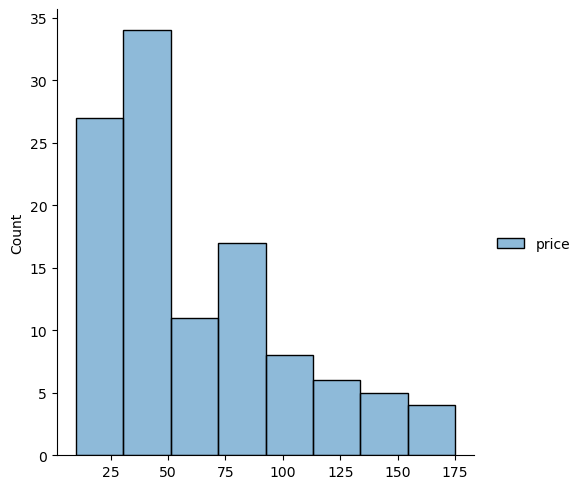

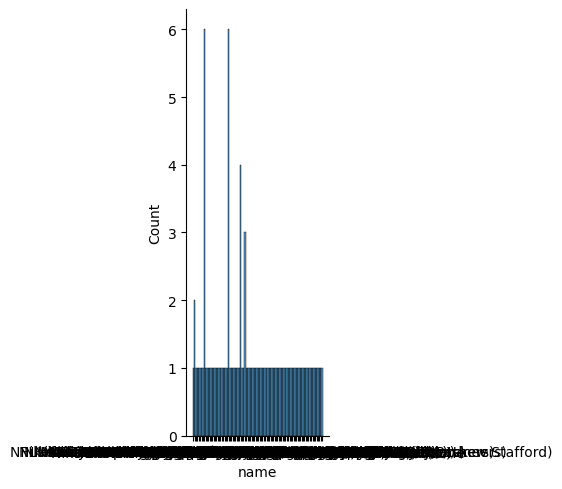

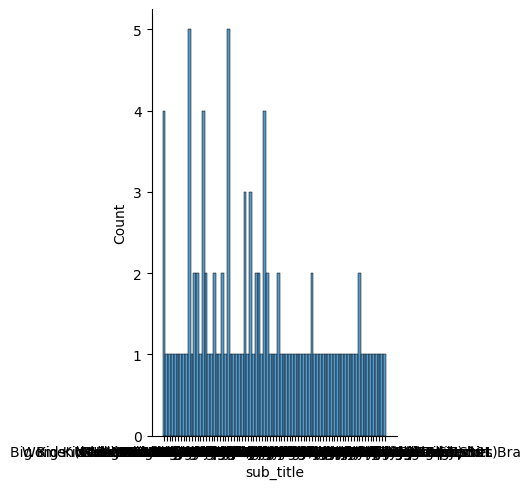

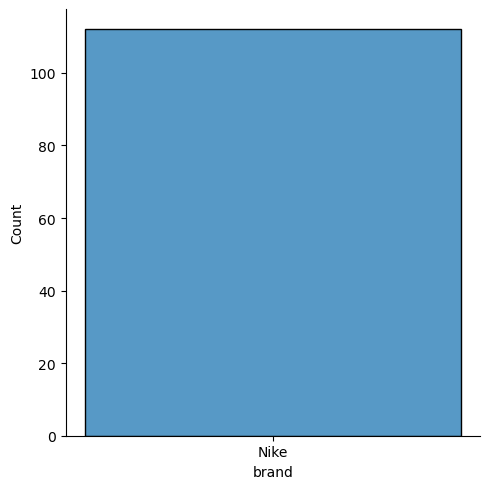

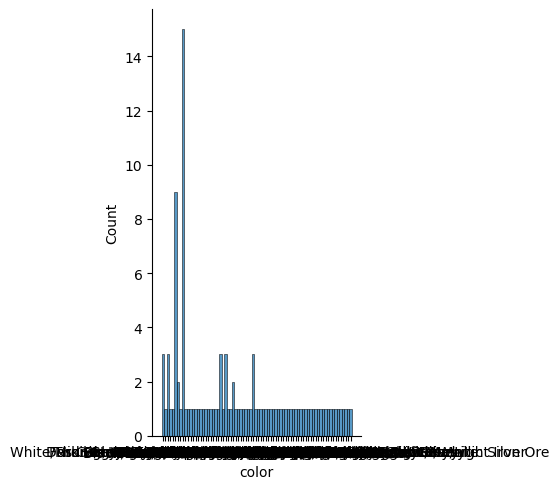

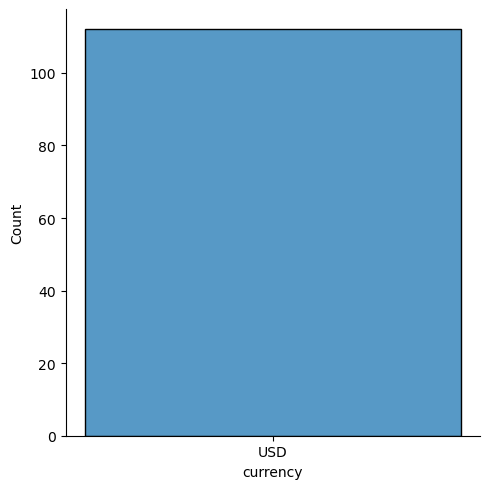

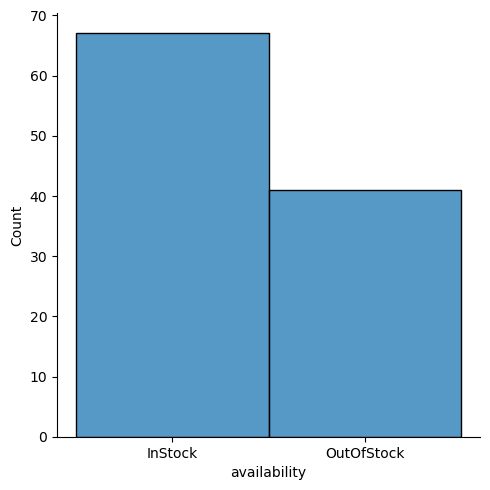

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


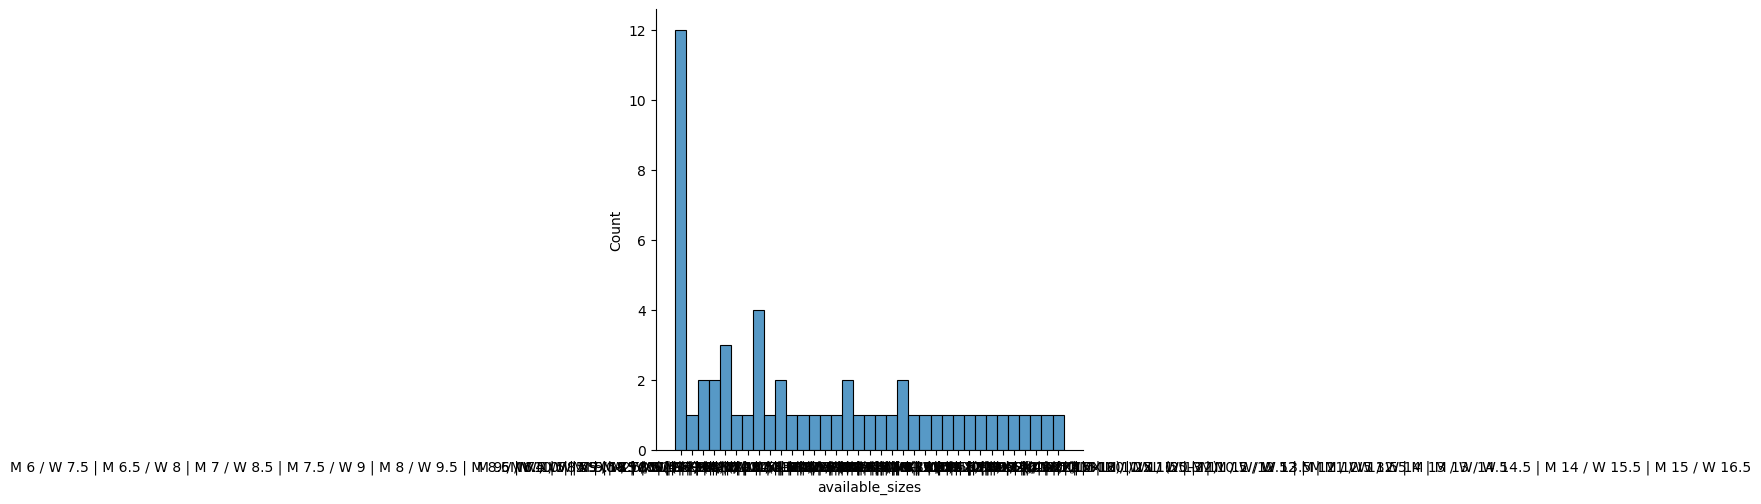

TypeError: 'value' must be an instance of str or bytes, not a int

In [132]:
for column in categorical.columns:
    
    sns.displot(data = categorical, x = column)
    plt.show()